<a href="https://colab.research.google.com/github/kellischeuble/DS-Unit-2-Applied-Modeling/blob/master/module2-wrangle-ml-datasets/Kelli_Scheuble_DS12_wrangle_ML_datasets_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
df = pd.read_csv('MACH_data/data.csv', sep='\t')

In [0]:
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,major
0,3.0,6.0,21017.0,3.0,7.0,18600.0,5.0,20.0,14957.0,2.0,...,1440.0,900.0,1,7,1,30,1,2,5,Marketing
1,5.0,17.0,3818.0,5.0,9.0,7850.0,1.0,16.0,5902.0,3.0,...,1536.0,864.0,1,1,1,60,2,1,2,mathematics
2,5.0,16.0,4186.0,5.0,12.0,2900.0,1.0,2.0,7160.0,1.0,...,375.0,667.0,1,2,2,10,2,1,2,Chemistry
3,2.0,12.0,9373.0,4.0,1.0,10171.0,2.0,7.0,10117.0,1.0,...,1280.0,720.0,1,6,1,60,1,3,2,international relations
4,5.0,13.0,9465.0,5.0,7.0,5284.0,2.0,19.0,8872.0,1.0,...,360.0,640.0,1,4,3,60,1,1,2,Management


In [0]:
df['religion'].value_counts(normalize=True)

2     0.234539
1     0.205663
4     0.135789
7     0.106560
12    0.101553
6     0.096817
10    0.034563
8     0.027855
3     0.020493
0     0.015485
9     0.010260
5     0.008178
11    0.002245
Name: religion, dtype: float64

In [0]:
# if I were to simply guess the majority class, I would guess Athiest every
# time, and be correct about 23% of the time

In [0]:
df['major'].value_counts(normalize=True)

Psychology                  0.035100
Business                    0.028165
English                     0.025450
psychology                  0.025365
Engineering                 0.018854
                              ...   
Broadcasting                0.000021
Philosophy & sociology      0.000021
Computer programming        0.000021
Computer studies            0.000021
Broadcast communication     0.000021
Name: major, Length: 8938, dtype: float64

In [0]:
# I could also potentially predict major 

In [0]:
# main body consisted of 20 quesitons
questions = {
    "Q1" : "Never tell anyone the real reason you did something unless it is useful to do so.",
    "Q2" : "The best way to handle people is to tell them what they want to hear.",
    "Q3" : "One should take action only when sure it is morally right.",
    "Q4" : "Most people are basically good and kind.",
    "Q5" : "It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.",
    "Q6" : "Honesty is the best policy in all cases.",
    "Q7" : "There is no excuse for lying to someone else.",
    "Q8" : "Generally speaking, people won't work hard unless they're forced to do so.",
    "Q9" : "All in all, it is better to be humble and honest than to be important and dishonest.",
    "Q10" : "When you ask someone to do something for you, it is best to give the real reasons for wanting it rather than giving reasons which carry more weight.",
    "Q11" : "Most people who get ahead in the world lead clean, moral lives.",
    "Q12" : "Anyone who completely trusts anyone else is asking for trouble.",
    "Q13" : "The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.",
    "Q14" : "Most people are brave.",
    "Q15" : "It is wise to flatter important people.",
    "Q16" : "It is possible to be good in all respects.",
    "Q17" : "P.T. Barnum was wrong when he said that there's a sucker born every minute.",
    "Q18" : "It is hard to get ahead without cutting corners here and there.",
    "Q19" : "People suffering from incurable diseases should have the choice of being put painlessly to death.",
    "Q20" : "Most people forget more easily the death of their parents than the loss of their property."
    }

# possible answers were represented on a 5 point scale
Q_scale = {
    1:'Disagree', 
    2:'Slightly disagree', 
    3:'Neutral', 
    4:'Slightly agree', 
    5:'Agree'
}

# A = answer
# I = position of item it was in the survey
# E = time spent on question in milliseconds


# this data only consists of people who choose to answer
# these next questions...
# brief measure of big five personality domains

personality_inventory = {
    'TIPI1': 'extraverted_enthusiastic', 
    'TIPI2': 'critical_quarrelsome', 
    'TIPI3': 'dependable_selfdisciplined', 
    'TIPI4': 'anxious_easily_upset', 
    'TIPI5':'open_to_new_experiences_complex', 
    'TIPI6': 'reserved_quiet', 
    'TIPI7': 'sympathetic_warm', 
    'TIPI8':'disorganized_careless', 
    'TIPI9':'calm_emotionally_stable',
    'TIP10': 'conventional_uncreative'
}

# rated "I see myself as:" _______ such that
TIP_rating_scale = {
    1:'Disagree strongly',
    2: 'Disagree moderately',
    3: 'Disagree a little',
    4:'Neither agree nor disagree',
    5:'Agree a little',
    6:'Agree moderately',
    7:'Agree strongly'
}


# these words were presentted as a check-list and subjects were instructed
# to check all of thte words whose definitions they are sure they know:
# 1 = checked
# 0 = unchecked
# words at VCL6, VCL9, and VCL12 are not real words

known_words= {
    'VCL1':'boat',
    'VCL2':'incoherent',
    'VCL3':'pallid',
    'VCL4':'robot',
    'VCL5':'audible',
    'VCL6':'cuivocal_fale',
    'VCL7':'paucity',
    'VCL8':'epistemology',
    'VCL9':'florted_fake',
    'VCL10':'decide',
    'VCL11':'pastiche',
    'VCL12':'verdid_fake',
    'VCL13':'abysmal',
    'VCL14':'lucid',
    'VCL15':'betray',
    'VCL16':'funny'
}

# more questions that were asked...

education_level = {
    1:'Less than high school', 
    2:'High school', 
    3:'University degree', 
    4:'Graduate degree'
}

area_lived_when_child = {
    1:'Rural (country side)', 
    2:'Suburban', 
    3:'Urban (town, city)'
}

gender = {
    0:'Unchecked',
    1:'Male',
    2:'Female',
    3:'Other'
}

english_native_language = {
    1:'Yes',
    2:'No'
}

dominant_hand = {
    1:'Right',
    2:'Left',
    0:'Both'
}

religion = {
    0:'Unchecked',
    1:'Agnostic',
    2:'Atheist',
    3:'Buddhist',
    4:'Christian (Catholic)',
    5:'Christian (Mormon)',
    6:'Christian (Protestant)',
    7:'Christian (Other)',
    8:'Hindu',
    9:'Jewish',
    10:'Muslim',
    11:'Sikh',
    12:'Other'
}

sexual_orientation = {
    1:'Heterosexual',
    2:'Bisexual', 
    3:'Homosexual', 
    4:'Asexual', 
    5:'Other'
}

race = {
    10:'Asian',
    20:'Arab', 
    30:'Black',
    40:'Indigenous Australian',
    50:'Native American', 
    60:'White',
    70:'Other'
}

voted_past_year = {
    1:'yes',
    2:'no'
}

marital_status = {
    1:'Never married', 
    2:'Currently married', 
    3:'Previously married'
}

# country, screenw, screenh were calculated by server. 
# we don't care about that. (maybe country)

# time spent on each page was recorded in seconds
# introelapse
# testelapse
# surveyelapse

In [0]:
pd.options.display.max_rows = 999
df.isnull().sum()


df[df['Q1A'].isnull()]

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,major
26286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,360.0,640.0,1,2,1,20,2,1,2,NaN
31072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1440.0,900.0,1,6,1,30,1,2,3,math/science
33399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1366.0,768.0,1,4,1,60,2,2,5,Electronic Engineering


In [0]:
train1, test = train_test_split(df, test_size= .2, random_state=42, stratify=df['religion'])

In [0]:
train1.shape, test.shape

((58791, 105), (14698, 105))

In [0]:
def wrangle(X):
    
    wrangled = X.copy()
    
    # looks like all of the NaNs are together....
    #drop these rows 
    wrangled = wrangled.dropna(thresh=45)
    
    # drop user's screen width bc I couldn't care less
    wrangled = wrangled.drop(columns=['screenw', 'screenh'])
    
    # get rid of columns with the 'position' of the question
    positions = []
    for x in range(1,21):
        positions.append(f'Q{x}I')
    wrangled = wrangled.drop(columns=positions)
    
    # replace 'NONE' in country with NaN... not sure why
    wrangled['country'] = wrangled['country'].replace(np.NaN,'NONE')
    # I have a feeling something is different here... so I might want to take 
    # a look at the answers that have a country of null vs NaN
    
    # make all majors have same casing
    wrangled['major'] = wrangled['major'].str.lower()
    wrangled['major'] = wrangled['major'].replace('none', 'NONE')
    wrangled['major'] = wrangled['major'].replace(np.NaN, 'NONE')
    
    wrangled = wrangled.dropna(subset=['introelapse'])
    
    return wrangled

train1 = wrangle(train1)
test = wrangle(test)

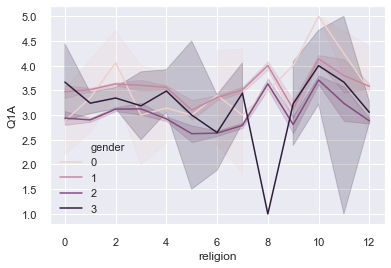

In [0]:
import seaborn as sns
import matplotlib as plt


sns.set(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x='religion', y='Q1A',
            hue="gender",
            data=train1);

# it's intereseting that there's a huge error bar for 
# unchecked and other, but not so much for male and female

In [0]:
# print out info for this
print('Question:', questions['Q1'])
print()
print(religion)
print()
print(gender)

Question: Never tell anyone the real reason you did something unless it is useful to do so.

{0: 'Unchecked', 1: 'Agnostic', 2: 'Atheist', 3: 'Buddhist', 4: 'Christian (Catholic)', 5: 'Christian (Mormon)', 6: 'Christian (Protestant)', 7: 'Christian (Other)', 8: 'Hindu', 9: 'Jewish', 10: 'Muslim', 11: 'Sikh', 12: 'Other'}

{0: 'Unchecked', 1: 'Male', 2: 'Female', 3: 'Other'}


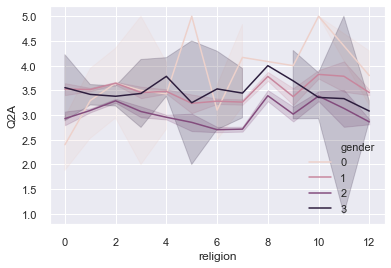

In [0]:
# Plot the responses for different events and regions
sns.lineplot(x='religion', y='Q2A',
            hue="gender",
            data=train1);


In [0]:
religion[1]

'Agnostic'

In [0]:
male_female = train1[(train1.gender == 1) | (train1.gender ==2)]
male_female['religion'] = male_female.religion.astype(str)

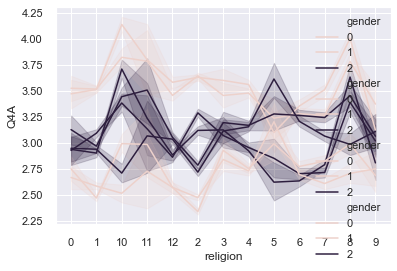

In [0]:
# i want to see if on average males and females in the 
# same religion have similar
# behaviors for all of the questions
for x in range(1,5):
    sns.lineplot(x="religion", y=f'Q{x}A',
            hue="gender",
            data=male_female)

In [0]:
# fast first model

In [0]:
train, val = train_test_split(train1, test_size=.20, stratify=train1['religion'], random_state=42)

In [0]:
train.isnull().sum().any()

False

In [0]:
train.shape, val.shape, test.shape

((47028, 83), (11758, 83), (14697, 83))

In [0]:
# I want to use all features, then select feature importance

# define target

target = 'religion'
train_features = train.drop(columns=[target])
features = train_features.columns.tolist()

In [0]:
# arrange data into X features matrix and y target vector

# training data
X_train = train[features]
y_train = train[target]

# validation data
X_val = val[features]
y_val = val[target]

# testing data
X_test = test[features]

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer


pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)
    
)

pipeline.fit(X_train, y_train)
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.48951688355873096
Validation Accuracy 0.32114305153937744


In [0]:
# so teeeechhhhnically we're beating the baseline

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
# Read New York City property sales data
import pandas as pd
df = pd.read_csv(DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv')

Your code starts here:

In [0]:
# Change column names: replace spaces with underscores
df.head()

In [0]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [0]:
df

In [0]:
df.neighborhood.value_counts()

In [0]:
# Keep just the subset of data for the Tribeca neighborhood
# Check how many rows you have now. (Should go down from > 20k rows to 146)
tribeca = df[df.neighborhood == 'TRIBECA']
df.shape, tribeca.shape

((23040, 21), (146, 21))

In [0]:
# Q. What's the date range of these property sales in Tribeca?
tribeca.sale_date.value_counts(ascending=False)

In [0]:
# The Pandas Profiling Report showed that SALE_PRICE was read as strings
# Convert it to integers
# df = df.replace('$   - 0', 0)
# df = df.str.lstrip('$')
# df.sale_price.astype(int)

In [0]:
# Q. What is the maximum SALE_PRICE in this dataset?


In [0]:
# Look at the row with the max SALE_PRICE


In [0]:
# Get value counts of TOTAL_UNITS
# Q. How many property sales were for multiple units?


In [0]:
# Keep only the single units


In [0]:
# Q. Now what is the max sales price? How many square feet does it have?


In [0]:
# Q. How often did $0 sales occur in this subset of the data?

# There's a glossary here: 
# https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

# It says:
# A $0 sale indicates that there was a transfer of ownership without a 
# cash consideration. There can be a number of reasons for a $0 sale including 
# transfers of ownership from parents to children. 



In [0]:
# Look at property sales for > 5,000 square feet
# Q. What is the highest square footage you see?


In [0]:
# What are the building class categories?
# How frequently does each occur?


In [0]:
# Keep subset of rows:
# Sale price more than $0, 
# Building class category = Condos - Elevator Apartments

# Check how many rows you have now. (Should be 106 rows.)


In [0]:
# Make a Plotly Express scatter plot of GROSS_SQUARE_FEET vs SALE_PRICE


In [0]:
# Add an OLS (Ordinary Least Squares) trendline,
# to see how the outliers influence the "line of best fit"


In [0]:
# Look at sales for more than $35 million

# All are at 70 Vestry Street
# All but one have the same SALE_PRICE & SALE_DATE
# Was the SALE_PRICE for each? Or in total?
# Is this dirty data?


In [0]:
# Make a judgment call:
# Keep rows where sale price was < $35 million

# Check how many rows you have now. (Should be down to 90 rows.)


In [0]:
# Now that you've removed outliers,
# Look again at a scatter plot with OLS (Ordinary Least Squares) trendline


In [0]:
# Select these columns, then write to a csv file named tribeca.csv. Don't include the index.
